In [39]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm



In [2]:
filenames = []
for file in os.listdir(r'C:/Users/abhin/Downloads/fashion/images'):
    filenames.append(os.path.join(r'C:/Users/abhin/Downloads/fashion/images',file))   

In [3]:
len(filenames)

44439

In [4]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
img = image.load_img('C:/Users/abhin/Downloads/fashion/images/16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.        , 0.00295298, 0.        , ..., 0.00752507, 0.02113524,
       0.00401739], dtype=float32)

In [6]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [7]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([0.        , 0.03642146, 0.00710437, ..., 0.00140771, 0.        ,
       0.05435037], dtype=float32)

In [15]:
image_features=[]
for file in filenames:
    image_features.append(extract_features_from_images(file,model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.03642146, 0.00710437, ..., 0.00140771, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747742, ..., 0.00346686, 0.03391019,
        0.04565743], dtype=float32),
 array([0.00306835, 0.06240452, 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.10469119, 0.00198091, ..., 0.        , 0.03033769,
        0.02712847], dtype=float32),
 array([0.        , 0.12438459, 0.01465611, ..., 0.00289707, 0.04055161,
        0.06534589], dtype=float32),
 array([0.        , 0.09169203, 0.01569911, ..., 0.        , 0.00503581,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545276, 0.01153319, ..., 0.00073009, 0.04513267,
        0.07661068], dtype=float32),
 array([0.        , 0.12812266, 0.01489691, ..., 0.00275864, 0.01144639,
        0.06897032], dtype=float32),
 array([0.        , 0.10192207, 0.01133395, ..., 0.        , 0.02424813,
        0.03721343], dtype=float32),
 array([0.

In [16]:
Image_features=pkl.dump(image_features,open('Images_features.pkl','wb'))

In [17]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))


In [18]:
Image_features = pkl.load(open('Images_features.pkl','rb'))


In [19]:
filenames = pkl.load(open('filenames.pkl','rb'))


In [20]:
np.array(Image_features).shape


(44439, 2048)

In [23]:
neighbors=NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [24]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [27]:
input_image = extract_features_from_images(r'C:\Users\abhin\Downloads\fashion\images\9854.jpg',model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


In [28]:
distance,indices = neighbors.kneighbors([input_image])


In [29]:
indices[0]


array([44315, 15046,  5185,  5181, 11263, 15308])

In [32]:
from IPython.display import Image

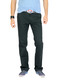

In [33]:
Image(r'C:\Users\abhin\Downloads\fashion\images\9854.jpg')


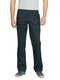

In [34]:
Image(filenames[indices[0][1]])


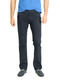

In [35]:
Image(filenames[indices[0][2]])


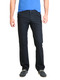

In [36]:
Image(filenames[indices[0][3]])


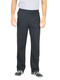

In [37]:
Image(filenames[indices[0][4]])


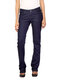

In [38]:
Image(filenames[indices[0][5]])
